In [1]:
# Importing the relevant Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Other libraries 
import string 
from difflib import SequenceMatcher
!pip3 install textblob
from textblob import TextBlob


# 1 Step. Data Loading

In [2]:
df = pd.read_csv(r'C:\Users\julia\Projects\A.C. Classification\data.csv')

In [3]:
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


# 2 Step. Data Cleaning

## 2.1 Animal Names

In [5]:
# Checking the categorical unique values in "AnimalName"
df["AnimalName"].unique()

array(['Dog', 'cat', 'Rabbit', 'cow', 'chicken', 'cattle', 'mammal',
       'Cattle', 'Horse', 'Turtle', 'Hamster', 'Lion', 'Fox', 'Fox ',
       'Goat', 'Deer', 'Chicken', 'Monkey', 'Birds', 'Sheep', 'Pigs',
       'Fowl', 'Duck', 'Other Birds', 'snake', 'horse', 'duck', 'donkey',
       'Donkey', 'mules', 'Elephant', 'Elk', 'Wapiti', 'Mule deer',
       'Black-tailed deer', 'Sika deer', 'White-tailed deer', 'Reindeer',
       'Moos', 'Tiger', 'Goats', 'Buffaloes', 'Dogs', 'Wolves', 'Hyaenas',
       'Pig'], dtype=object)

In [6]:
animalName = list(df['AnimalName'].str.lower().unique())
animalName.sort()
print(animalName)

['birds', 'black-tailed deer', 'buffaloes', 'cat', 'cattle', 'chicken', 'cow', 'deer', 'dog', 'dogs', 'donkey', 'duck', 'elephant', 'elk', 'fowl', 'fox', 'fox ', 'goat', 'goats', 'hamster', 'horse', 'hyaenas', 'lion', 'mammal', 'monkey', 'moos', 'mule deer', 'mules', 'other birds', 'pig', 'pigs', 'rabbit', 'reindeer', 'sheep', 'sika deer', 'snake', 'tiger', 'turtle', 'wapiti', 'white-tailed deer', 'wolves']


In [7]:
# Repitition of the same category of animal names in plural form 
df['AnimalName'] = df['AnimalName'].str.lower()

# Handling variants of bird names
df['AnimalName'] = df['AnimalName'].replace('chicken', 'hen')
df['AnimalName'] = df['AnimalName'].replace('fowl', 'bird')
df['AnimalName'] = df['AnimalName'].replace('other birds', 'bird')

# Handling plurals
df['AnimalName'] = df['AnimalName'].replace('birds', 'bird')
df['AnimalName'] = df['AnimalName'].replace('buffaloes', 'buffalo')
df['AnimalName'] = df['AnimalName'].replace('dogs', 'dog')
df['AnimalName'] = df['AnimalName'].replace('goats', 'goat')
df['AnimalName'] = df['AnimalName'].replace('hyaenas', 'hyaena')
df['AnimalName'] = df['AnimalName'].replace('pigs', 'pig')
df['AnimalName'] = df['AnimalName'].replace('wolves', 'wolf')
df['AnimalName'] = df['AnimalName'].replace('mules', 'mule')
df['AnimalName'] = df['AnimalName'].replace('moos', 'cow')
df['AnimalName'] = df['AnimalName'].replace('fox ', 'fox')

In [8]:
animalName = list(df['AnimalName'].str.lower().unique())
animalName.sort()
print(animalName)

['bird', 'black-tailed deer', 'buffalo', 'cat', 'cattle', 'cow', 'deer', 'dog', 'donkey', 'duck', 'elephant', 'elk', 'fox', 'goat', 'hamster', 'hen', 'horse', 'hyaena', 'lion', 'mammal', 'monkey', 'mule', 'mule deer', 'pig', 'rabbit', 'reindeer', 'sheep', 'sika deer', 'snake', 'tiger', 'turtle', 'wapiti', 'white-tailed deer', 'wolf']


## 2.2 Symptoms

In [9]:
# Checking the categorical unique values in "Symptoms"
symp1 = set(df["symptoms1"].unique())
symp2 = set(df["symptoms2"].unique())
symp3 = set(df["symptoms3"].unique())
symp4 = set(df["symptoms4"].unique())
symp5 = set(df["symptoms5"].unique())

In [10]:
# Checking common symptoms between symptom features
len(symp1.intersection(symp2))

21

In [11]:
# Checking the total number of unique symptoms 
symp_total = symp1.union(symp2).union(symp3).union(symp4).union(symp5)
len(symp_total)

935

In [12]:
# Checking for repetition of symptoms with different styles
len(df[df['symptoms1'].str.lower() == 'fever']) == len(df[df['symptoms1'] == 'Fever'])

False

In [13]:
#Cross-referencing that with the dataframe
test_df = df[df['symptoms1'].str.lower() == 'fever']
test_df['symptoms1'].unique()

array(['Fever', 'fever'], dtype=object)

In [14]:
df[df['symptoms1'] == 'fever'].head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
386,horse,fever,mild colic,loss of tail tone,loss of appetite,depression,Yes
388,horse,fever,loss of appetite,respiratory noise,Weight loss,depression,Yes
389,horse,fever,nasal discharge,muscular stiffness,swollen lymph nodes,depression,Yes
415,buffalo,fever,loss of appetite,rapid pulse and heart rates,lameness in affected leg,depression,Yes
416,sheep,fever,loss of appetite,rapid pulse and heart rates,lameness in affected leg,depression,Yes


In [15]:
df[df['symptoms1'] == 'Fever'].head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


### Transforming everything to lower case

In [16]:
cols = list(df.columns)
for col in cols:
    df[col] = df[col].str.lower()

df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,dog,fever,diarrhea,vomiting,weight loss,dehydration,yes
1,dog,fever,diarrhea,coughing,tiredness,pains,yes
2,dog,fever,diarrhea,coughing,vomiting,anorexia,yes
3,dog,fever,difficulty breathing,coughing,lethargy,sneezing,yes
4,dog,fever,diarrhea,coughing,lethargy,blue eye,yes


In [17]:
# Checking unique count again 
symp1 = set(df["symptoms1"].unique())
symp2 = set(df["symptoms2"].unique())
symp3 = set(df["symptoms3"].unique())
symp4 = set(df["symptoms4"].unique())
symp5 = set(df["symptoms5"].unique())

# Checking the total number of unique symptoms 
symp_total = symp1.union(symp2).union(symp3).union(symp4).union(symp5)
len(symp_total)

879

In [18]:
# Repetitive categories have reduced from 935 to 876

### Further data exploration

In [19]:
symp_total = list(symp_total)
symp_total.sort()

print(symp_total[:10])

[' abortion at the end of gestation', ' dizziness and fainting', 'abdminal pain', 'abdominal destention', 'abdominal discomfort', 'abdominal pain', 'abdonormal discomfort', 'abdonormal pain', 'abnormal behaviour', 'abnormal conformation']


In [20]:
#before correcting the names of symptoms let's check for empty values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


## Handling empty values

In [21]:
df.isnull().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

In [22]:
df_null = df.isnull()
df_null[df_null['Dangerous'] == True]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,False,False,False,False,False,False,True
695,False,False,False,False,False,False,True


In [23]:
df.iloc[269]

AnimalName             sheep
symptoms1      teeth griding
symptoms2             apathy
symptoms3        dehydration
symptoms4     ruminal stasis
symptoms5      watery faeces
Dangerous                NaN
Name: 269, dtype: object

In [24]:
df.iloc[695]

AnimalName           buffalo
symptoms1      teeth griding
symptoms2             apathy
symptoms3        dehydration
symptoms4     ruminal stasis
symptoms5      watery faeces
Dangerous                NaN
Name: 695, dtype: object

In [25]:
# Different animals having exactly the same symptoms.
# For the sake of analysis leaving it out as an outlier.
df = df.dropna(how = 'any', axis = 0)
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,dog,fever,diarrhea,vomiting,weight loss,dehydration,yes
1,dog,fever,diarrhea,coughing,tiredness,pains,yes
2,dog,fever,diarrhea,coughing,vomiting,anorexia,yes
3,dog,fever,difficulty breathing,coughing,lethargy,sneezing,yes
4,dog,fever,diarrhea,coughing,lethargy,blue eye,yes


In [26]:
df.isnull().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     0
dtype: int64

## Removing characters like space and spelling errors

In [27]:
# Data exploration has revealed errors and presence of spaces in the names of symptoms

#Checking the unique characters found in all columns 
characters_unique = set()
cols = list(df.columns)
for col in cols:
    for value in df[col]:
        for letter in value:
            characters_unique.add(letter)

print(characters_unique)

{'y', '(', 'b', 'a', 'k', '\xa0', 'p', ',', 'j', 'i', 'd', 'n', 'o', 'z', ')', 't', 'u', '-', 'w', 'r', 'f', 's', 'x', 'v', 'g', 'e', 'h', 'l', ' ', '_', 'c', 'm', '.', 'q'}


In [28]:
# Removing all the alphabets to see what remains
temp = []
for ele in characters_unique:
    if ele not in string.ascii_lowercase:
        temp.append(ele)
print(temp)

['(', '\xa0', ',', ')', '-', ' ', '_', '.']


In [29]:
# Creating a cleaning function to change unwanted characters to spaces
def clean(word):
    for extra in ['.', ')', ' ', ',', '(', '-', '\xa0', '_']:
        word = word.replace(extra, ' ')
        
    list_words = word.split()
    final_word = ""
    for ele in list_words:
        ele = ele.strip()

        flag = True
        for letter in ele:
            if letter not in string.ascii_lowercase:
                flag = False

        if flag:
            final_word += ele + " "

    return final_word.strip()

#check if it works
clean(' - test ,test. test_  ')

'test test test'

In [30]:
# Performing cleaning function on all columns 
cols = list(df.columns)
for col in cols:
    df[col] = df[col].apply(clean)

df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,dog,fever,diarrhea,vomiting,weight loss,dehydration,yes
1,dog,fever,diarrhea,coughing,tiredness,pains,yes
2,dog,fever,diarrhea,coughing,vomiting,anorexia,yes
3,dog,fever,difficulty breathing,coughing,lethargy,sneezing,yes
4,dog,fever,diarrhea,coughing,lethargy,blue eye,yes


In [31]:
df.tail()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
866,buffalo,fever,difficulty breathing,poor appetite,eye and skin change,unable to exercise,yes
867,buffalo,fever,loss of appetite,lession on the skin,lethargy,joint pain,yes
868,buffalo,lesions in the nasal cavity,lesions on nose,vomiting,noisy breathing,lesions on nose,yes
869,buffalo,hair loss,dandruff,vomiting,crusting of the skin,ulcerated skin,yes
870,buffalo,greenish yellow nasal discharge,lack of pigmentation,vomiting,lethargy,pain on face,yes


In [32]:
# Checking unique counts again
symp1 = set(df["symptoms1"].unique())
symp2 = set(df["symptoms2"].unique())
symp3 = set(df["symptoms3"].unique())
symp4 = set(df["symptoms4"].unique())
symp5 = set(df["symptoms5"].unique())

# Checking the total number of unique symptoms. Still 17 repetitive values.
symp_total = symp1.union(symp2).union(symp3).union(symp4).union(symp5)
len(symp_total)

862

## Dealing with spelling mistakes

In [33]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Cheking if it works
similar('abdominal pain', 'abdminal pain')

0.9629629629629629

In [34]:
df.columns

Index(['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4',
       'symptoms5', 'Dangerous'],
      dtype='object')

In [35]:
def change(df, ws, new):
    symps = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']
    for col in symps:
        for w in ws:
            df[col] = df[col].replace(w, new)
    return df

In [36]:
# Structuring the words and the output
symp_total = list(symp_total)

similarity_scores = []
for i1, word1 in enumerate(symp_total):
    for i2, word2 in enumerate(symp_total[i1+1:]):
        ratio = similar(word1, word2)
        if ratio > 0.75: # 0.75 as a threshold
            value = [ratio, (word1, word2)]
            similarity_scores.append(value)

similarity_scores.sort(key=lambda val: val[0], reverse = True)
len(similarity_scores)

312

In [37]:
# A lot of spelling mistakes were revealed.
similarity_scores[:10]

[[0.9787234042553191, ('difficulty in breathing', 'difficultty in breathing')],
 [0.975609756097561, ('high body temperature', 'high body temperaure')],
 [0.975609756097561, ('difficulty in walking', 'difficult in walking')],
 [0.9743589743589743, ('difficulty breathing', 'difficulty breating')],
 [0.9743589743589743, ('difficulty breathing', 'diffculty breathing')],
 [0.972972972972973, ('discharge from eye', 'discharge from eyes')],
 [0.9714285714285714, ('aversion to light', 'anversion to light')],
 [0.9714285714285714, ('skin colour change', 'skin color change')],
 [0.9714285714285714, ('decreased appetite', 'decrease appetite')],
 [0.9696969696969697, ('ocular discharge', 'occular discharge')]]

In [38]:
# All manual checks were carried out.

# Similarity score >= 0.9

df = change(df = df, ws = ['difficultty in breathing', 'difficulty in breathing', 
                           'difficulty breating', 'difficulty breathing', 
                           'diffculty breathing', 'difficulty breathing', 
                           'labored breathing', 'lound breathing', 
                           'respiratory noise', 'respiratory distress', 
                          'gasping for breath', 'gasping for air'], new = 'breathing difficulty')
df = change(df = df, ws = ['difficulty in walking', 'difficult in walking', 
                           'limp', 'lip', 'inability to stand',
                           'difficulty in walk', 'difficulty walking', 'walking problem',
                           'lameness', 'legness'], new = 'walking difficulty')
df = change(df = df, ws = ['high body temperaure', 'high body temperature'], new = 'high body temperature')
df = change(df = df, ws = ['discharge from eye', 'discharge from eyes'], new = 'discharge from eyes')
df = change(df = df, ws = ['decreased appetite', 'decrease appetite', 'poor appetite',
                           'loss of eat', 'loss of appettite', 'loss of appetite', 'reduced appetite',
                           'loss od appetite', 'loss of appetite', 'unable to eat',
                           'loss of appetite', 'lack of appetite'], new = 'decreased appetite')
df = change(df = df, ws = ['skin color change', 'skin colour change'], new = 'skin color change')
df = change(df = df, ws = ['aversion to light', 'anversion to light'], new = 'aversion to light')
df = change(df = df, ws = ['ocular discharge', 'occular discharge', 
                           'eye discharges', 'eye disharge', 
                           'discharge from eyes', 'mucus discharge from the eye'], new = 'ocular discharge')
df = change(df = df, ws = ['fluffed feather', 'fluffed feathers'], new = 'fluffed feathers')
df = change(df = df, ws = ['abdominal pain', 'abdminal pain', 
                           'abdonormal discomfort', 'abdominal discomfort', 
                           'abdonormal pain', 'abdominal pain'], new = 'abdominal pain')
df = change(df = df, ws = ['inappetence', 'inappentence'], new = 'inappetence')
df = change(df = df, ws = ['skin reashes', 'skin rashes'], new = 'skin rashes')
df = change(df = df, ws = ['nosebleeds', 'nose bleeds', 
                           'nose bleeds', 'nosebleed'], new = 'nose bleeds')
df = change(df = df, ws = ['despression', 'depression'], new = 'depression')
df = change(df = df, ws = ['weightloss', 'weight loss'], new = 'weight loss')
df = change(df = df, ws = ['watery eyes', 'watery eye'], new = 'watery eyes')
df = change(df = df, ws = ['diffulty swallowing', 'difficulty swallowing'], new = 'difficulty swallowing')
df = change(df = df, ws = ['swelling of joints', 'swelling on joints'], new = 'joints swell')
df = change(df = df, ws = ['vomitting', 'vomiting'], new = 'vomit')
df = change(df = df, ws = ['dizzines', 'dizziness'], new = 'dizziness')
df = change(df = df, ws = ['dullness', 'dull ness'], new = 'dullness')
df = change(df = df, ws = ['diarrhea', 'diarrhoea'], new = 'diarrhoea')
df = change(df = df, ws = ['head ache', 'headache', 
                           'head tossing', 'head pressing'], new = 'headache')
df = change(df = df, ws = ['pneumonia', 'pnemonia'], new = 'pneumonia')
df = change(df = df, ws = ['bloody diarrhea', 'bloody diarhhea'], new = 'bloody diarrhoea')
df = change(df = df, ws = ['watery eyes', 'watery eye'], new = 'watery eyes')
df = change(df = df, ws = ['diffulty swallowing', 'difficulty swallowing', 
                           'difficulty in swallowing', 'difficulty swallowing'], new = 'difficulty swallowing')
df = change(df = df, ws = ['abnormalities', 'abnormalalities'], new = 'abnormalities')
df = change(df = df, ws = ['blood in faces', 'blood on faces', 
                           'blood stool', 'blood in stool'], new = 'bloody faces')
df = change(df = df, ws = ['tremor', 'tremors'], new = 'tremor')
df = change(df = df, ws = ['anemia', 'aneamia', 
                          'anemia', 'anaemia'], new = 'anemia')
df = change(df = df, ws = ['hyperesthesia', 'hyperaestesia'], new = 'hyperesthesia')
df = change(df = df, ws = ['attack', 'attacks'], new = 'attack')
df = change(df = df, ws = ['lesion', 'lesions', 
                          'lession on the skin', 'lession on cat skin'], new = 'lesion')
df = change(df = df, ws = ['excess salivation', 'excession salivation', 
                           'excessive grooming', 'excessive drooling', 
                           'excess salivation', 'excess salivary'], new = 'excess salivation')
df = change(df = df, ws = ['muscles ache', 'muscle aches'], new = 'muscle ache')
df = change(df = df, ws = ['nausea', 'nause'], new = 'nausea')
df = change(df = df, ws = ['edema', 'oedema'], new = 'edema')
df = change(df = df, ws = ['ulcers', 'ulcer'], new = 'ulcer')
df = change(df = df, ws = ['sweat', 'sweats', 
                           'sweating'], new = 'sweat')
df = change(df = df, ws = ['grinding teeth', 'grinding of teeth'], new = 'grinding of teeth')
df = change(df = df, ws = ['scratching', 'scartching'], new = 'scratching')
df = change(df = df, ws = ['join pains', 'joint pain'], new = 'joint pain')
df = change(df = df, ws = ['salivating', 'salivation'], new = 'salivation')
df = change(df = df, ws = ['week pulse', 'weak pulse'], new = 'week pulse')

In [39]:
# Similarity score >= 0.8 and <0.9

df = change(df = df, ws = ['oains', 'pain', 
                           'pain', 'pains'], new = 'pain')
df = change(df = df, ws = ['shaking oh head', 'shaking head', 
                            'head shking', 'head shaking'], new = 'head shaking')
df = change(df = df, ws = ['scratches', 'scartches'], new = 'scratching')
df = change(df = df, ws = ['muscle stiffness', 'muscular stiffness'], new = 'muscle stiffness')
df = change(df = df, ws = ['ruffled feathers', 'fluffed feathers', 
                           'puffed up feather', 'ruffled feathers'], new = 'ruffled feathers')
df = change(df = df, ws = ['seizuers', 'seizures'], new = 'seizures')
df = change(df = df, ws = ['lethargy', 'lathargy'], new = 'lathargy')
df = change(df = df, ws = ['weekness', 'weakness'], new = 'weakness')
df = change(df = df, ws = ['bleeding wounds', 'bleeding from wounds'], new = 'bleeding from wounds')
df = change(df = df, ws = ['gasc', 'gas'], new = 'gas')
df = change(df = df, ws = ['high temperature', 'high body temperature'], new = 'high temperature')
df = change(df = df, ws = ['fatigue', 'fatique'], new = 'fatigue')
df = change(df = df, ws = ['distress', 'stress'], new = 'stress')
df = change(df = df, ws = ['poor coat condition', 'poor condition', 
                           'poor condition', 'poor body condition', 
                           'poor coat condition', 'poor body condition'], new = 'poor condition')
df = change(df = df, ws = ['relunctance to move', 'reluctant move'], new = 'reluctant move')
df = change(df = df, ws = ['bloody urine', 'blood in urine'], new = 'bloody urine')
df = change(df = df, ws = ['change in gait', 'changed gait'], new = 'change in gait')
df = change(df = df, ws = ['drop in milk production', 'decrease in milk production'], new = 'decrease in milk production')
df = change(df = df, ws = ['thivk skin', 'thicked skin'], new = 'thick skin')
df = change(df = df, ws = ['tear produce', 'tear production'], new = 'tear production')
df = change(df = df, ws = ['rapid heartbeats', 'rapid heart rate'], new = 'rapid heartbeats')
df = change(df = df, ws = ['flock moratality', 'kid moratality'], new = 'flock moratality')
df = change(df = df, ws = ['skin irritation', 'irritation'], new = 'skin irritation')
df = change(df = df, ws = ['itchiness', 'itches', 'itching'], new = 'itches')
df = change(df = df, ws = ['listless', 'listlessness'], new = 'listless')
df = change(df = df, ws = ['drooping wings', 'droopy wings'], new = 'droopy wings')
df = change(df = df, ws = ['tachypea', 'trachea'], new = 'trachea')
df = change(df = df, ws = ['hot joints', 'hock joint'], new = 'hot joints')
df = change(df = df, ws = ['cough', 'coughing'], new = 'cough')
df = change(df = df, ws = ['swelling on thebody'], new = 'swelling on the body')

In [40]:
# rechecking unique count 
symp1 = set(df["symptoms1"].unique())
symp2 = set(df["symptoms2"].unique())
symp3 = set(df["symptoms3"].unique())
symp4 = set(df["symptoms4"].unique())
symp5 = set(df["symptoms5"].unique())

# Checking the total number of unique symptoms 
symp_total = symp1.union(symp2).union(symp3).union(symp4).union(symp5)
len(symp_total)

740

In [41]:
#Repiting categories were reduced from 862 to 740
862 - 740

122

In [42]:
# Leveraging textblob to correct spelling errors
symps = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']
for col in symps:
    df[col] = df[col].apply(lambda txt: ''.join(TextBlob(txt).correct()))

df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneering,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes


## 2.3 Final Check Up of Cleaned Data

In [43]:
df['AnimalName'].unique()

array(['dog', 'cat', 'rabbit', 'cow', 'hen', 'cattle', 'mammal', 'horse',
       'turtle', 'hamster', 'lion', 'fox', 'goat', 'deer', 'monkey',
       'bird', 'sheep', 'pig', 'duck', 'snake', 'donkey', 'mule',
       'elephant', 'elk', 'wapiti', 'mule deer', 'black tailed deer',
       'sika deer', 'white tailed deer', 'reindeer', 'tiger', 'buffalo',
       'wolf', 'hyaena'], dtype=object)

In [44]:
# Checking unique count of symptoms
symp1 = set(df["symptoms1"].unique())
symp2 = set(df["symptoms2"].unique())
symp3 = set(df["symptoms3"].unique())
symp4 = set(df["symptoms4"].unique())
symp5 = set(df["symptoms5"].unique())

# Checking the total number of unique symptoms
symp_total = symp1.union(symp2).union(symp3).union(symp4).union(symp5)
len(symp_total)
# The count is the same

740

In [45]:
df['Dangerous'].unique()

array(['yes', 'no'], dtype=object)

In [46]:
# Final cleaning function on all columns 
cols = list(df.columns)
for col in cols:
    df[col] = df[col].apply(clean)

# Checking the dataframe
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneering,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes


In [47]:
# Renaming the columns
df.rename(columns={'AnimalName': 'Animal', 
                   'symptoms1': 'Symptom 1', 
                   'symptoms2': 'Symptom 2', 
                   'symptoms3': 'Symptom 3', 
                   'symptoms4': 'Symptom 4',
                   'symptoms5': 'Symptom 5'}, inplace=True)

# Checking the dataframe
df.head()

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneering,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes


In [48]:
# Exporting the dataframe as csv
df.to_csv("AC_clean.csv", index=False)

# 3 Step. Exploration

In [49]:
len(df)

869

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 869 entries, 0 to 870
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Animal     869 non-null    object
 1   Symptom 1  869 non-null    object
 2   Symptom 2  869 non-null    object
 3   Symptom 3  869 non-null    object
 4   Symptom 4  869 non-null    object
 5   Symptom 5  869 non-null    object
 6   Dangerous  869 non-null    object
dtypes: object(7)
memory usage: 54.3+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'dog'),
  Text(1, 0, 'cat'),
  Text(2, 0, 'rabbit'),
  Text(3, 0, 'cow'),
  Text(4, 0, 'hen'),
  Text(5, 0, 'cattle'),
  Text(6, 0, 'mammal'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'turtle'),
  Text(9, 0, 'hamster'),
  Text(10, 0, 'lion'),
  Text(11, 0, 'fox'),
  Text(12, 0, 'goat'),
  Text(13, 0, 'deer'),
  Text(14, 0, 'monkey'),
  Text(15, 0, 'bird'),
  Text(16, 0, 'sheep'),
  Text(17, 0, 'pig'),
  Text(18, 0, 'duck'),
  Text(19, 0, 'snake'),
  Text(20, 0, 'donkey'),
  Text(21, 0, 'mule'),
  Text(22, 0, 'elephant'),
  Text(23, 0, 'elk'),
  Text(24, 0, 'wapiti'),
  Text(25, 0, 'mule deer'),
  Text(26, 0, 'black tailed deer'),
  Text(27, 0, 'sika deer'),
  Text(28, 0, 'white tailed deer'),
  Text(29, 0, 'reindeer'),
  Text(30, 0, 'tiger'),
  Text(31, 0, 'buffalo'),
  Text(32, 0, 'wolf'),
  Text(33, 0, 'hyaena')])

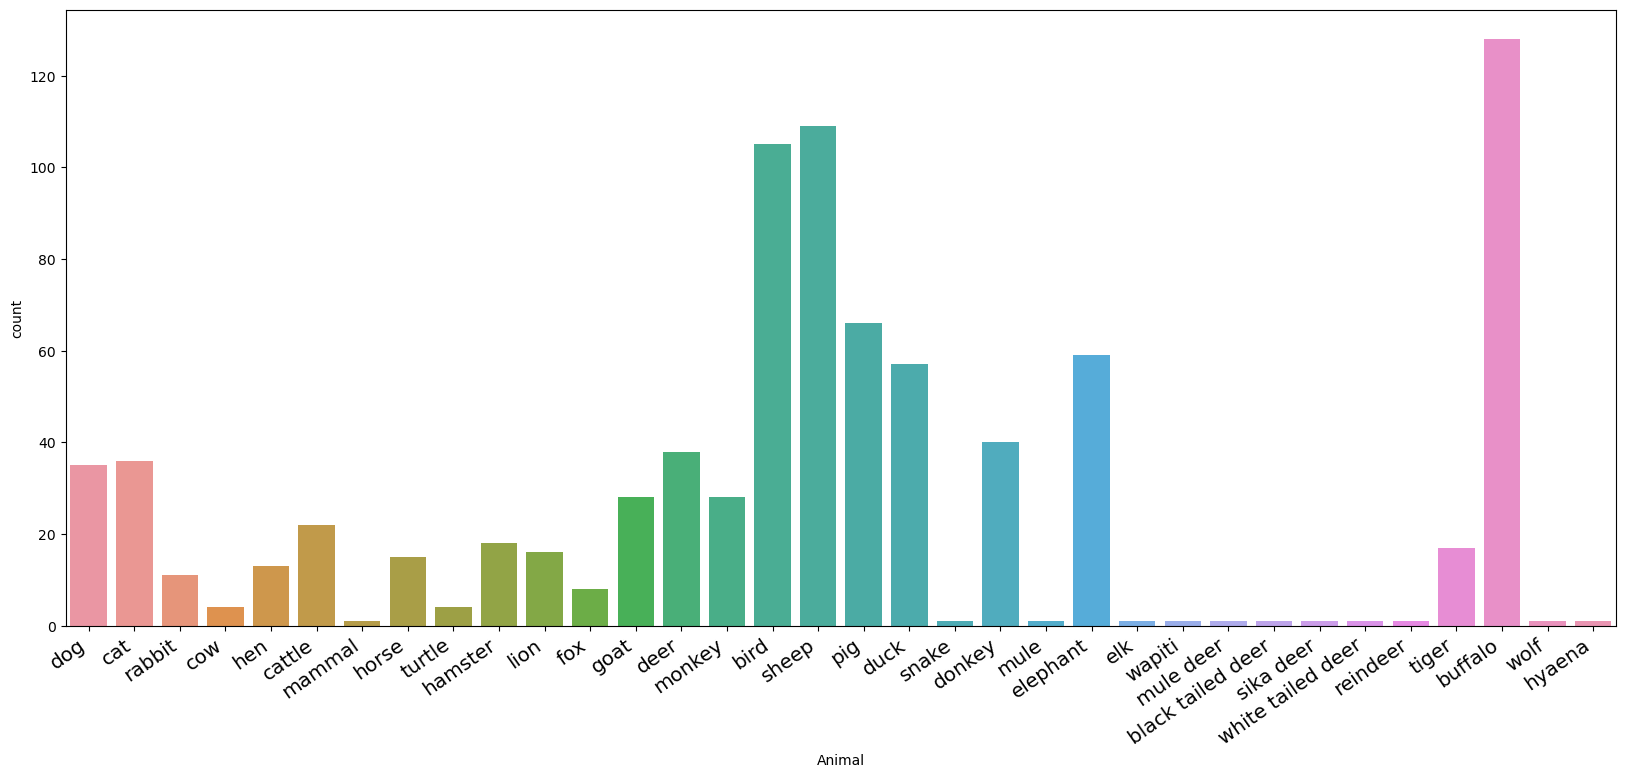

In [51]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="Animal", data=df)
plt.xticks(
    rotation=35,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' 
)

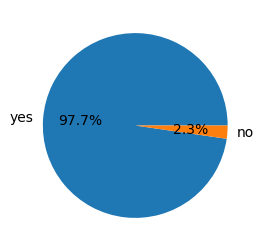

In [52]:
plt.figure(figsize=(3,3))
plt.pie(df.Dangerous.value_counts(),labels=['yes','no'],autopct='%1.1f%%')
plt.show()